Nas aulas anteriores você aprendeu a dividir a base de dados entre treinamento e teste para avaliar os algoritmos de classificação. Porém, existe uma outra técnica que é mais utilizada no meio científico, que é a validação cruzada. Na próxima aula, você terá uma breve introdução teórica a esta técnica <br>

O objetivo deste exercício é aplicar a validação cruzada e comparar os resultados com a abordagem de treinamento e teste. Acesse aqui a documentação do sklearn para entender melhor sobre a implementação <br>

Logo após a aula teórica, você pode assistir o vídeo com a solução <br>

Bom trabalho!

Jones

In [161]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# Leitura dos dados

In [162]:
dataset = pd.read_csv('credit_data.csv')
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [164]:
dataset.dropna(inplace= True) #apaga os dados vazios diretamente no dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  1997 non-null   int64  
 1   income      1997 non-null   float64
 2   age         1997 non-null   float64
 3   loan        1997 non-null   float64
 4   c#default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


## Divisão e Treinamento

In [165]:
X = dataset.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [166]:
y = dataset['c#default'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Dividindo a base de dados


In [167]:
resultados_gaussian = []
resultados_logistic_regression = []
resultados_random_forest = []
resultados_knn = []

for i in range(30):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, stratify=y, random_state= i)

    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treino,y_treino)
    resultados_gaussian.append(accuracy_score(y_teste,naive_bayes.predict(X_teste)))

    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_treino,y_treino)
    resultados_logistic_regression.append(accuracy_score(y_teste, logistic_regression.predict(X_teste)))

    random_forest = RandomForestClassifier()
    random_forest.fit(X_treino,y_treino)
    resultados_random_forest.append(accuracy_score(y_teste,random_forest.predict(X_teste)))

    knn = KNeighborsClassifier()
    knn.fit(X_treino,y_treino)
    resultados_knn.append(accuracy_score(y_teste,knn.predict(X_teste)))

In [168]:
resultados_gaussian = np.array(resultados_gaussian)
print(resultados_gaussian)
resultados_logistic_regression = np.array(resultados_logistic_regression)
print(resultados_logistic_regression)
resultados_random_forest = np.array(resultados_random_forest)
print(resultados_random_forest)
resultados_knn = np.array(resultados_knn)
print(resultados_knn)

[0.925  0.925  0.9325 0.925  0.92   0.905  0.9175 0.9175 0.9125 0.9325
 0.9225 0.9125 0.935  0.9175 0.925  0.9175 0.9275 0.92   0.9325 0.92
 0.93   0.905  0.9175 0.9325 0.9425 0.9375 0.94   0.92   0.935  0.925 ]
[0.9325 0.91   0.9125 0.9225 0.9075 0.89   0.91   0.9075 0.8775 0.915
 0.9175 0.9    0.925  0.9175 0.9025 0.9125 0.9525 0.91   0.9225 0.9075
 0.925  0.905  0.9075 0.945  0.9225 0.9275 0.9225 0.9175 0.91   0.9   ]
[0.9825 0.9875 0.9825 0.995  0.98   0.98   0.9825 0.985  0.98   0.9875
 0.98   0.985  0.9725 0.985  0.98   0.98   0.9875 0.985  0.99   0.9875
 0.98   0.9725 0.985  0.99   0.985  0.995  0.9875 0.9875 0.99   0.985 ]
[0.8275 0.84   0.8225 0.8425 0.82   0.86   0.8425 0.84   0.8425 0.825
 0.8275 0.825  0.8375 0.815  0.835  0.85   0.8425 0.8475 0.84   0.835
 0.8175 0.845  0.85   0.85   0.845  0.835  0.8275 0.825  0.8425 0.8275]


## Analisando os modelos

In [169]:
analise_gaussian = {}
analise_logistic_regression = {}
analise_random_forest = {}
analise_knn = {}

In [170]:
def analise_modelos(Nome_dicionario : dict, resultados : np.ndarray):
    Nome_dicionario['Média'] = resultados.mean()
    Nome_dicionario['Moda'] = statistics.mode(resultados)
    Nome_dicionario['Mediana'] = np.median(resultados)
    Nome_dicionario['Variância'] = np.var(resultados)
    Nome_dicionario['Desvio padrão'] = np.std(resultados)
    Nome_dicionario['Coeficiente de variação'] = stats.variation(resultados) * 100

In [171]:
analise_modelos(analise_gaussian, resultados_gaussian)
analise_modelos(analise_logistic_regression, resultados_logistic_regression)
analise_modelos(analise_random_forest , resultados_random_forest)
analise_modelos(analise_knn, resultados_knn)
print('Gaussian:')
pprint(analise_gaussian)
print('Logistic Regression')
pprint(analise_logistic_regression)
print('Random forest')
pprint(analise_random_forest)
print('Knn')
pprint(analise_knn)

Gaussian:
{'Coeficiente de variação': 1.0124407504578252,
 'Desvio padrão': 0.00935748363610645,
 'Mediana': 0.925,
 'Moda': 0.925,
 'Média': 0.92425,
 'Variância': 8.756250000000001e-05}
Logistic Regression
{'Coeficiente de variação': 1.5821056616884057,
 'Desvio padrão': 0.014468356276140472,
 'Mediana': 0.9125,
 'Moda': 0.91,
 'Média': 0.9145,
 'Variância': 0.00020933333333333337}
Random forest
{'Coeficiente de variação': 0.5273653814330831,
 'Desvio padrão': 0.005191472709057508,
 'Mediana': 0.985,
 'Moda': 0.98,
 'Média': 0.9844166666666666,
 'Variância': 2.69513888888889e-05}
Knn
{'Coeficiente de variação': 1.3094899329827057,
 'Desvio padrão': 0.010948427081346237,
 'Mediana': 0.83875,
 'Moda': 0.8425,
 'Média': 0.8360833333333333,
 'Variância': 0.00011986805555555569}


In [172]:
#criando os vetores do gráfico
modelos = [analise_gaussian, analise_knn, analise_logistic_regression, analise_random_forest]
nome_modelos = ['Gaussian','Knn', 'Logistic Regression', 'Random Forest']
media = []
coeficiente_de_variaçao = []
for dicionarios in modelos:
    for chave,valor in dicionarios.items():
        if chave == 'Média':
            media.append(valor * 100)
        if chave == 'Coeficiente de variação':
            coeficiente_de_variaçao.append(valor)
print(media)
print(coeficiente_de_variaçao)
print(nome_modelos)

[92.425, 83.60833333333333, 91.45, 98.44166666666666]
[1.0124407504578252, 1.3094899329827057, 1.5821056616884057, 0.5273653814330831]
['Gaussian', 'Knn', 'Logistic Regression', 'Random Forest']


Text(0, 0.5, 'Porcentagem')

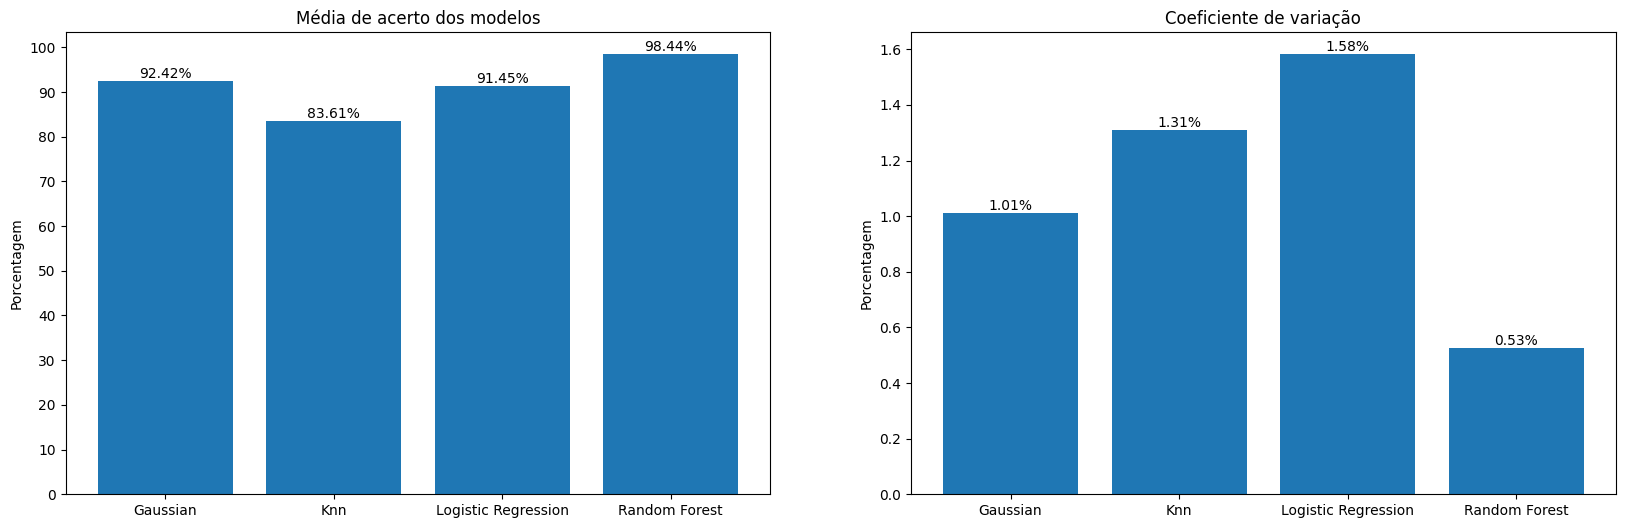

In [173]:
fig,axes =plt.subplots(1,2, figsize = (20,6))
axes[0].bar(nome_modelos,media)
for i, porcentagem in enumerate(media):
    axes[0].text(nome_modelos[i], media[i], f'{porcentagem:.2f}%', fontsize=10, ha='center', va='bottom')
axes[0].set_title('Média de acerto dos modelos')
axes[0].set_ylabel('Porcentagem')
axes[0].set_yticks(range(0,101,10)) ;

axes[1].bar(nome_modelos,coeficiente_de_variaçao)
for i, porcentagem in enumerate(coeficiente_de_variaçao):
    axes[1].text(nome_modelos[i], coeficiente_de_variaçao[i], f'{porcentagem:.2f}%', fontsize=10, ha='center', va='bottom')
axes[1].set_title('Coeficiente de variação')
axes[1].set_ylabel('Porcentagem')

## Validação Cruzada

In [174]:
resultados_gaussian_cv = []
resultados_logistic_regression_cv = []
resultados_random_forest_cv = []
resultados_knn_cv = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_gaussian_cv.append(scores.mean())

    logistic_regression = LogisticRegression()
    scores = cross_val_score(logistic_regression, X, y, cv = kfold)
    resultados_logistic_regression_cv.append(scores.mean())

    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_random_forest_cv.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X, y, cv = kfold)
    resultados_knn_cv.append(scores.mean())

In [175]:
resultados_gaussian_cv = np.array(resultados_gaussian_cv)
print(resultados_gaussian_cv)
resultados_logistic_regression_cv = np.array(resultados_logistic_regression_cv)
print(resultados_logistic_regression)
resultados_random_forest_cv = np.array(resultados_random_forest_cv)
print(resultados_random_forest_cv)
resultados_knn_cv = np.array(resultados_knn_cv)
print(resultados_knn_cv)


[0.92486181 0.92491709 0.92488945 0.92288191 0.92487186 0.92538945
 0.92438442 0.92488945 0.92487186 0.92388945 0.92538442 0.92440201
 0.92537437 0.92439447 0.92538693 0.92488191 0.92588442 0.92489447
 0.92388191 0.92588442 0.92589447 0.92538945 0.92436432 0.92638442
 0.92289447 0.92538945 0.92488693 0.92539196 0.92538191 0.92588442]
[0.9325 0.91   0.9125 0.9225 0.9075 0.89   0.91   0.9075 0.8775 0.915
 0.9175 0.9    0.925  0.9175 0.9025 0.9125 0.9525 0.91   0.9225 0.9075
 0.925  0.905  0.9075 0.945  0.9225 0.9275 0.9225 0.9175 0.91   0.9   ]
[0.98496734 0.9864799  0.9849799  0.98697487 0.98848744 0.9854799
 0.98647739 0.98848995 0.9879799  0.98748744 0.98697236 0.98697487
 0.98697739 0.98948241 0.98798744 0.98847739 0.98748744 0.98897487
 0.98547739 0.98598241 0.98647236 0.98598241 0.98347487 0.98597739
 0.9844799  0.98648492 0.9849799  0.98598241 0.98648995 0.98848492]
[0.83524874 0.83625377 0.83975879 0.82423367 0.83774874 0.83274874
 0.83674874 0.82821357 0.83474121 0.83275377 0.82

# Analisando os modelos da Validação Cruzada

In [176]:
analise_gaussian_cv = {}
analise_logistic_regression_cv = {}
analise_random_forest_cv = {}
analise_knn_cv = {}

In [177]:
analise_modelos(analise_gaussian_cv, resultados_gaussian_cv)
analise_modelos(analise_logistic_regression_cv, resultados_logistic_regression_cv)
analise_modelos(analise_random_forest_cv , resultados_random_forest_cv)
analise_modelos(analise_knn_cv, resultados_knn_cv)
print('Gaussian:')
pprint(analise_gaussian_cv)
print('Logistic Regression')
pprint(analise_logistic_regression_cv)
print('Random forest')
pprint(analise_random_forest_cv)
print('Knn')
pprint(analise_knn_cv)

Gaussian:
{'Coeficiente de variação': 0.08641071566366061,
 'Desvio padrão': 0.0007992437562393775,
 'Mediana': 0.9248919597989949,
 'Moda': 0.9248894472361808,
 'Média': 0.9249359296482411,
 'Variância': 6.387905818876295e-07}
Logistic Regression
{'Coeficiente de variação': 0.38801026116292653,
 'Desvio padrão': 0.0035455669237623223,
 'Mediana': 0.9130979899497487,
 'Moda': 0.9113718592964826,
 'Média': 0.9137817420435511,
 'Variância': 1.2571044810877418e-05}
Random forest
{'Coeficiente de variação': 0.14336593124187344,
 'Desvio padrão': 0.0014146110952225782,
 'Mediana': 0.9864874371859296,
 'Moda': 0.9859824120603016,
 'Média': 0.9867135678391962,
 'Variância': 2.001124550726822e-06}
Knn
{'Coeficiente de variação': 0.45634581063587903,
 'Desvio padrão': 0.0038114797078585105,
 'Mediana': 0.836252512562814,
 'Moda': 0.835248743718593,
 'Média': 0.835217420435511,
 'Variância': 1.4527377563417197e-05}


In [181]:
#criando os vetores do gráfico
modelos_cv = [analise_gaussian_cv, analise_knn_cv, analise_logistic_regression_cv, analise_random_forest_cv]
nome_modelos_cv = ['Gaussian CV','Knn CV', 'Logistic Regression CV', 'Random Forest CV']
media_cv = []
coeficiente_de_variaçao_cv = []
for dicionarios in modelos_cv:
    for chave,valor in dicionarios.items():
        if chave == 'Média':
            media_cv.append(valor * 100)
        if chave == 'Coeficiente de variação':
            coeficiente_de_variaçao_cv.append(valor)
print(media_cv)
print(media)
print(coeficiente_de_variaçao_cv)
print(coeficiente_de_variaçao)
print(nome_modelos_cv)

[92.49359296482412, 83.5217420435511, 91.3781742043551, 98.67135678391962]
[92.425, 83.60833333333333, 91.45, 98.44166666666666]
[0.08641071566366061, 0.45634581063587903, 0.38801026116292653, 0.14336593124187344]
[1.0124407504578252, 1.3094899329827057, 1.5821056616884057, 0.5273653814330831]
['Gaussian CV', 'Knn CV', 'Logistic Regression CV', 'Random Forest CV']


Text(0, 0.5, 'Porcentagem')

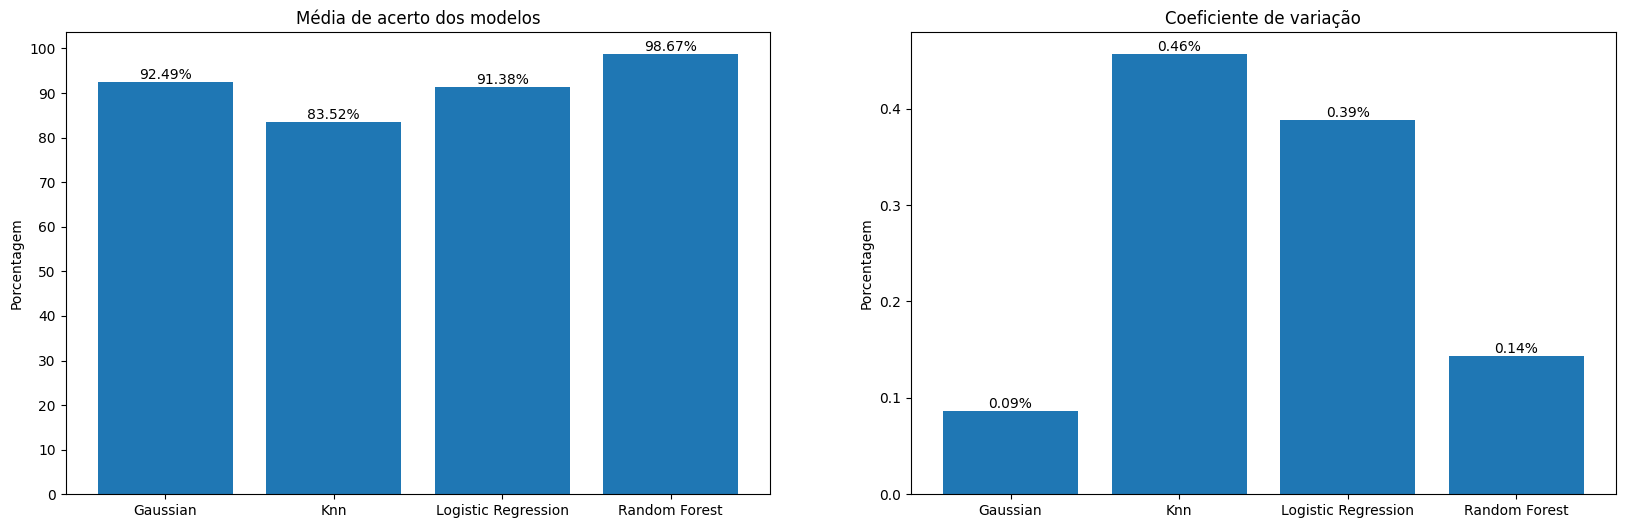

In [182]:
fig,axes =plt.subplots(1,2, figsize = (20,6))
axes[0].bar(nome_modelos,media_cv)
for i, porcentagem in enumerate(media_cv):
    axes[0].text(nome_modelos[i], media_cv[i], f'{porcentagem:.2f}%', fontsize=10, ha='center', va='bottom')
axes[0].set_title('Média de acerto dos modelos')
axes[0].set_ylabel('Porcentagem')
axes[0].set_yticks(range(0,101,10)) 

axes[1].bar(nome_modelos,coeficiente_de_variaçao_cv)
for i, porcentagem in enumerate(coeficiente_de_variaçao_cv):
    axes[1].text(nome_modelos[i], coeficiente_de_variaçao_cv[i], f'{porcentagem:.2f}%', fontsize=10, ha='center', va='bottom')
axes[1].set_title('Coeficiente de variação')
axes[1].set_ylabel('Porcentagem')


## Comparação geral

In [185]:
total_nome_modelos = nome_modelos + nome_modelos_cv
total_media = media + media_cv
total_coeficiente = coeficiente_de_variaçao + coeficiente_de_variaçao_cv
print(total_coeficiente)
print(total_nome_modelos)
print(total_media)

[1.0124407504578252, 1.3094899329827057, 1.5821056616884057, 0.5273653814330831, 0.08641071566366061, 0.45634581063587903, 0.38801026116292653, 0.14336593124187344]
['Gaussian', 'Knn', 'Logistic Regression', 'Random Forest', 'Gaussian CV', 'Knn CV', 'Logistic Regression CV', 'Random Forest CV']
[92.425, 83.60833333333333, 91.45, 98.44166666666666, 92.49359296482412, 83.5217420435511, 91.3781742043551, 98.67135678391962]


Text(0, 0.5, 'Porcentagem')

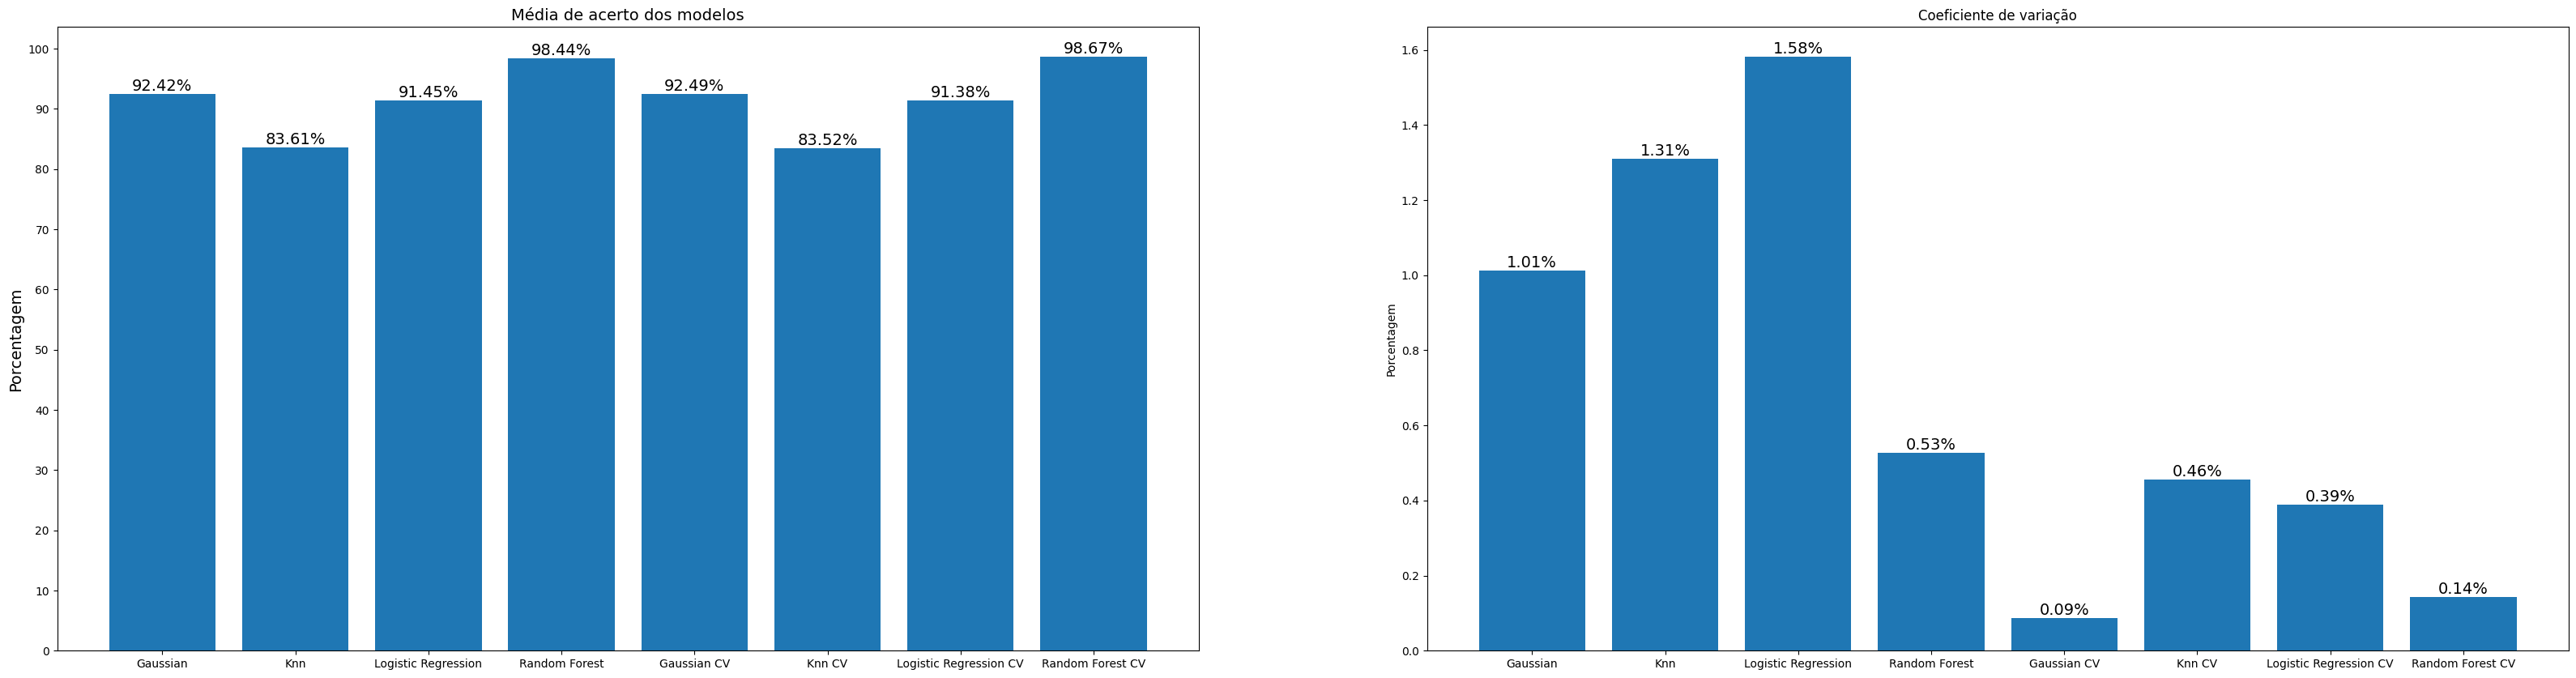

In [202]:
fig,axes = plt.subplots(1,2, figsize = (40,10))
axes[0].bar(total_nome_modelos,total_media)
for i, porcentagem in enumerate(total_media):
    axes[0].text(total_nome_modelos[i], total_media[i], f'{porcentagem:.2f}%', fontsize=14, ha='center', va='bottom')
axes[0].set_title('Média de acerto dos modelos', fontsize = 14)
axes[0].set_ylabel('Porcentagem', fontsize = 14)
axes[0].set_yticks(range(0,101,10)) 


axes[1].bar(total_nome_modelos,total_coeficiente)
for i, porcentagem in enumerate(total_coeficiente):
    axes[1].text(total_nome_modelos[i], total_coeficiente[i], f'{porcentagem:.2f}%', fontsize=14, ha='center', va='bottom')
axes[1].set_title('Coeficiente de variação')
axes[1].set_ylabel('Porcentagem')

## Conclusão:
O modelo Random Forest treinado utilizando a validação cruzada, seria o melhor modelo neste caso. Possui maior média de acertos e o segundo menor coeficinte de variação.